# Supervised Learning

As we have seen, there were various kinds of supervised learning. This part of the notes will focus on the types of supervised learning in detail, and the programming aspects of it.

## Linear Regression

This is the first type of supervised learning we are going to look at. First of all, what is regression? It is a prediction technique that predicts the output as a *number* rather than a *feature*.
<br>

Linear regression is a technique which assumes that the relation between the input and output can be established with a linear function.

Let's say we pass a dataset with output for each data as $y$ and inputs as $x$. If the dataset has $n$ features and $k$ data samples, then the output $y$ is predicted by using the following formula: $$y = \theta _0 + \theta _1 \, x_1 + \theta _2 \, x_2 + ... + \theta _n \, x_n + \epsilon$$
<br>

Infact, for each data $i$, we have: $$y_i = \theta _0 + \theta _1 \, x_{i1} + \theta _2 \, x_{i2} + ... + \theta _n \, x_{in} + \epsilon$$
where:
- $y_i$ is the $i^ \text {th}$ data out of the $k$ data samples
- $x_{i1}$ to $x_{in}$ represents the $n$ data features of the $i^ \text {th}$ data
- $\theta _0$ is the intercept parameter
- $\theta _1$ to $\theta _n$ are feature coefficients or weights
- $\epsilon$ is the error term

**Intercept Parameter**: This is required because the output is always not 0 when the input is 0. This parameter specifies the default value of $y$ or the output if the input is 0.
<br>

**Feature coefficients**: This is required because all features do not contribute the same way to the  output. Some matter more than the others. This parameter does the exact job. It sets how important a feature is by using weights or numbers. A higher number signifies higher weight or higher contribution to the output.
<br>

**Error**: This is required because no real world data is perfect. There is always some noise in data that causes the model to make bad predictions. Hence, this term is used to adjust the values.

These values are not provided by humans, rather the model finds out these parameters using more functions and multiple trials.

Did you know that this equation can actually be (and actually is) written in the form of matrices: $$y = X \, \theta + \epsilon$$
where:
$y = \begin {bmatrix} y_1 \\ y_2 \\ ... \\ y_n \end {bmatrix}, 
X = \begin {bmatrix} x^T_1 \\ x^T_2 \\ ... \\ x^T_n \end {bmatrix} = \begin {bmatrix} 1 & x_{11} & x_{12} & ... & x_{1n} \\ 1 & x_{21} & x_{22} & ... & x_{2n} \\ ... & ... & ... & ... & ... \\ 1 & x_{k1} & x_{k2} & ... & x_{kn} \end {bmatrix},
\theta = \begin {bmatrix} \theta _0 \\ \theta _1 \\ ... \\ \theta _n \end {bmatrix},
\epsilon = \begin {bmatrix} \epsilon _1 \\ \epsilon _2 \\ ... \\ \epsilon _n \end {bmatrix}$

**Simple Linear Regression (SLR)**: It is a special case of linear regression where the number of data samples is only 1. That is, the model predicts for only one data.

### Assumptions of Linear Regression

Linear regression models assume that these four things are alright for making better predictions. Hence, it is important to maintain them while building a model. These assumptions are:
- Weak exogeneity
- Linearity
- Constant variance (Homoscedasticity)
- Independence of errors

#### Weak Exogeneity

A model is said to have weak exogenic features (X) if they are independent of the error term ($\epsilon$). This is important for building LR models because they make wrong predictions due to the errors or exceptions. A model which has features dependent on the error term are weak endogenic.
<br>

Consider this example, where the house price is decided based on the square feet. This has weak exogenic features because the square feet depends on the architecture, design etc. which are valid and not error prone.
<br>

On the other hand, consider predicting students' marks with their study time. Here, there will certainly be some error because the amount of time spent on studying does not determine a student's marks. Some naturally score higher, while some score less despite of studying for a long time. Hence, this is weak endogenic because the features depend on the error term.

#### Linearity

LR models assume that the relations are linear. Not the linear as in linear function, but a proportional or additive relation between inputs and outputs.
<br>

Consider the same example given above. The model assumes that the number of marks obtained is proportional to study time (which is actually not true).

#### Homoscedasticity

Homoscedasticity or constant variance means the input features vary equally from each other or the variance is uniform. For LR models, this is important because scattered input features may mean varying relations between the input and the output.
<br>

If the variance is not constant, it can also be called heteroscedastic.

#### Independence of Errors

It simply means that the error terms are independent of each other. That is, one error term does not depend on its previous error terms. This is an important aspect because if the model makes a mistake, it continues to make bigger mistakes if the error terms are related.

## $R^2$ Test

$R^2$ test is used to check how well the model fits the data. It basically explains how well the model can explain the output features (y).
<br>

A higher value of $R^2$ means the model fits the data well, whereas a lower value signifies a bad fit. The formula for finding the $R^2$ value is:
$$R^2 = 1 - \frac {\sum (y_ \text {true} - y_ \text {pred})^2}{\sum (y_ \text {true} - \frac {1}{n} \, y_ \text {true})^2}$$

The value of $R^2$ can vary from -1 to 1, with 1 being the best. A model with a score 0 means the model always predicts the expected values y, disregarding the input features.

## Confusion Matrix

A confusion matrix summarizes the performance of a model on test data. For a binary classification, it is 2x2 matrix.
<br>

The matrix displays the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) produced by the model on the test data.

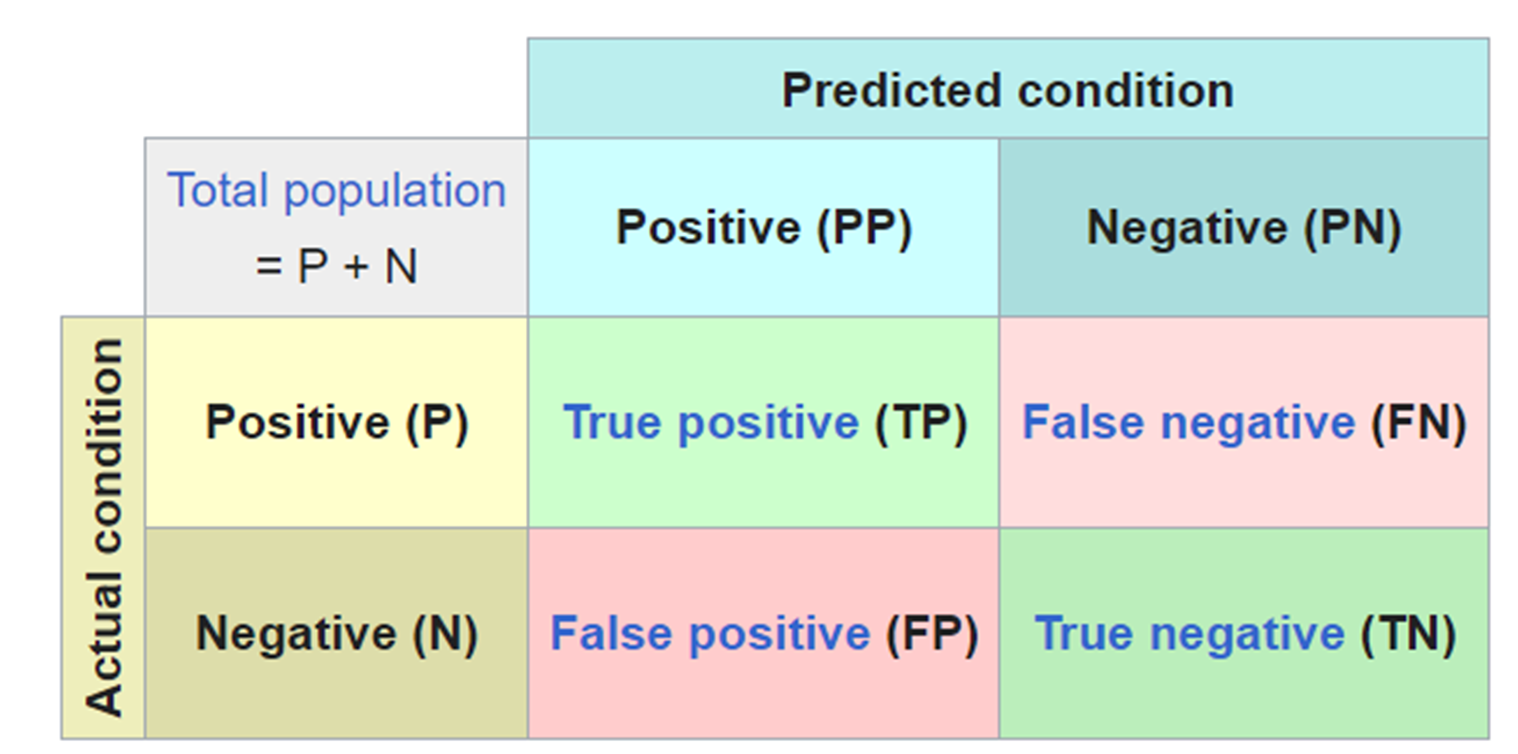

As we saw, there are four terms:
- **True Positive**: The model predicted whatever the actual information was and it was positive
- **False Positive**: The model predicited the opposite of the actual information, and the actual information was positive.
- **True Negative**: The model predicted whatever the actual information was and it was negative
- **False Negative**: The model predicited the opposite of the actual information, and the actual information was negative.
<br>

Here is a simple way to remember: True or False talks about the relation between the model's prediction and the actual value, and Positive or Negative are just the two possible output features. 
<br>

For example, positive could mean a dog is there and negative means a dog is not there, in a matrix which talks about dog prediction.
<br>

In an example where we consider medicines, False Negative or False Positive can be very dangerous. False Negative or miss, means the model missed someone who was ill. False Positive means the model predicts someone is ill, although they are healthy.

To create Confusion Matrix on Python, use the `confusion_matrix` function from `sklearn.metrics`.

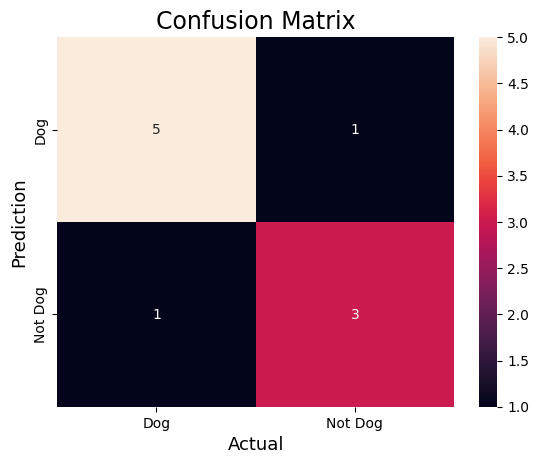

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

actual = np.array(['Dog','Dog','Dog','Not Dog','Dog','Not Dog','Dog','Dog','Not Dog','Not Dog'])
predicted = np.array(['Dog','Not Dog','Dog','Not Dog','Dog','Dog','Dog','Dog','Not Dog','Not Dog'])

cm = confusion_matrix(actual,predicted)
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Dog','Not Dog'], yticklabels=['Dog','Not Dog'])

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

### Statistical Parameter

There are four statistical parameters that are used to find out the model's performance:
- Accuracy
- Precision
- Recall
- F1 Score
<br>

#### Accuracy

Used to measure the performance of a model. It is the ratio of number of correct instances to the total number of instance. It is widely used in general model performance tests.
$$\text {Accuracy} = \frac {\text {TP} + \text {TN}}{\text {TP} + \text {TN} + \text {FP} + \text {FN}}$$

#### Precision

Also called Positive Predictive Value (PPV), it is the measure of how accurate the model's positive predictions are. It is useful in places where positive predictions matter the most.
$$\text {Precision} = \frac {\text {TP}}{\text {TP} + \text {FP}}$$

#### Recall

Measures the effectiveness of a classification model in identifying all relevant instances from a dataset.
It is the ratio of the number of true positive (TP) instances to the sum of true positive and false negative (FN) instances.
$$\text {Recall} = \frac {\text {TP}}{\text {TP} + \text {FN}}$$

#### F1 Score

Ssed to evaluate the overall performance of a classification model. It is the harmonic mean of precision and recall. This parameter is extremely useful where both precision and recall can be considered. We take the harmonic mean because the arithmetic mean (average) which is usually used to find the accuracy can be misleading when either of the parameter gets affected.
$$\text {F1 Score} = \frac {2 \cdot \text {Precision} \cdot \text {Recall}}{\text {Precision} + \text {Recall}}$$

# Ridge Regression

Ridge Regression, also called Tikhonov Regularization, is an extension of OLS designed for situations where the independent variables are highly correlated or where the model is too complex. When features are strongly related, OLS struggles because the regression coefficients can grow extremely large and become sensitive to tiny changes in the data, leading to high variance and unstable predictions. Ridge Regression solves this problem by adding a penalty term to the OLS loss function. Instead of minimizing only the sum of squared errors, Ridge minimizes the sum of squared errors plus a penalty proportional to the sum of the squares of the coefficients. This penalty shrinks coefficient values toward zero, preventing them from becoming excessively large. As a result, Ridge Regression produces a more stable model, handles multicollinearity effectively, and reduces overfitting by discouraging the model from relying too heavily on any single feature. Although Ridge slightly increases bias, it drastically reduces variance, leading to better generalization on unseen data. Unlike Lasso, Ridge never eliminates variables completely; it only shrinks their coefficients.



## Ordinary Least Squares (OLS)

Ordinary Least Squares (OLS) is the basic method used to estimate the coefficients of a linear regression model. The goal of OLS is to find the straight line or hyperplane that best fits the data by minimizing the total squared difference between the actual values of the dependent variable and the values predicted by the model. For every data point, the model computes an error term, which is the difference between the real value (y) and the predicted value (ŷ). OLS squares each of these errors so that negative and positive errors do not cancel out and so that larger mistakes are penalized more strongly. After squaring, OLS adds up all these squared differences and chooses the coefficients that make this sum as small as possible. This method works well when the dataset is clean, the features are not strongly correlated with each other, and there is enough data. However, OLS becomes unstable and unreliable when the independent variables are highly correlated or when the model is at risk of overfitting.

In [2]:
# importing libraries 
from sklearn.linear_model import Ridge 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler 

# loading california housing dataset 
boston = fetch_california_housing() 
X = boston.data[:, :13] 
y = boston.target 

print ("Boston dataset keys : \n", boston.keys()) 
print ("\nBoston data : \n", boston.data) 

# scaling the inputs 
scaler = StandardScaler() 
scaled_X = scaler.fit_transform(X) 

# Train Test split will be used for both models 
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3) 

# training model with 0.5 alpha value 
model = Ridge(alpha = 0.5,tol = 0.001, solver ='auto', random_state = 42) 
model.fit(X_train, y_train) 

# predicting the y_test 
y_pred = model.predict(X_test) 

# finding score for our model 
score = model.score(X_test, y_test) 
print("\n\nModel score : ", score) 

Boston dataset keys : 
 dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

Boston data : 
 [[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


Model score :  0.6031680935960076


# Logistic Regression

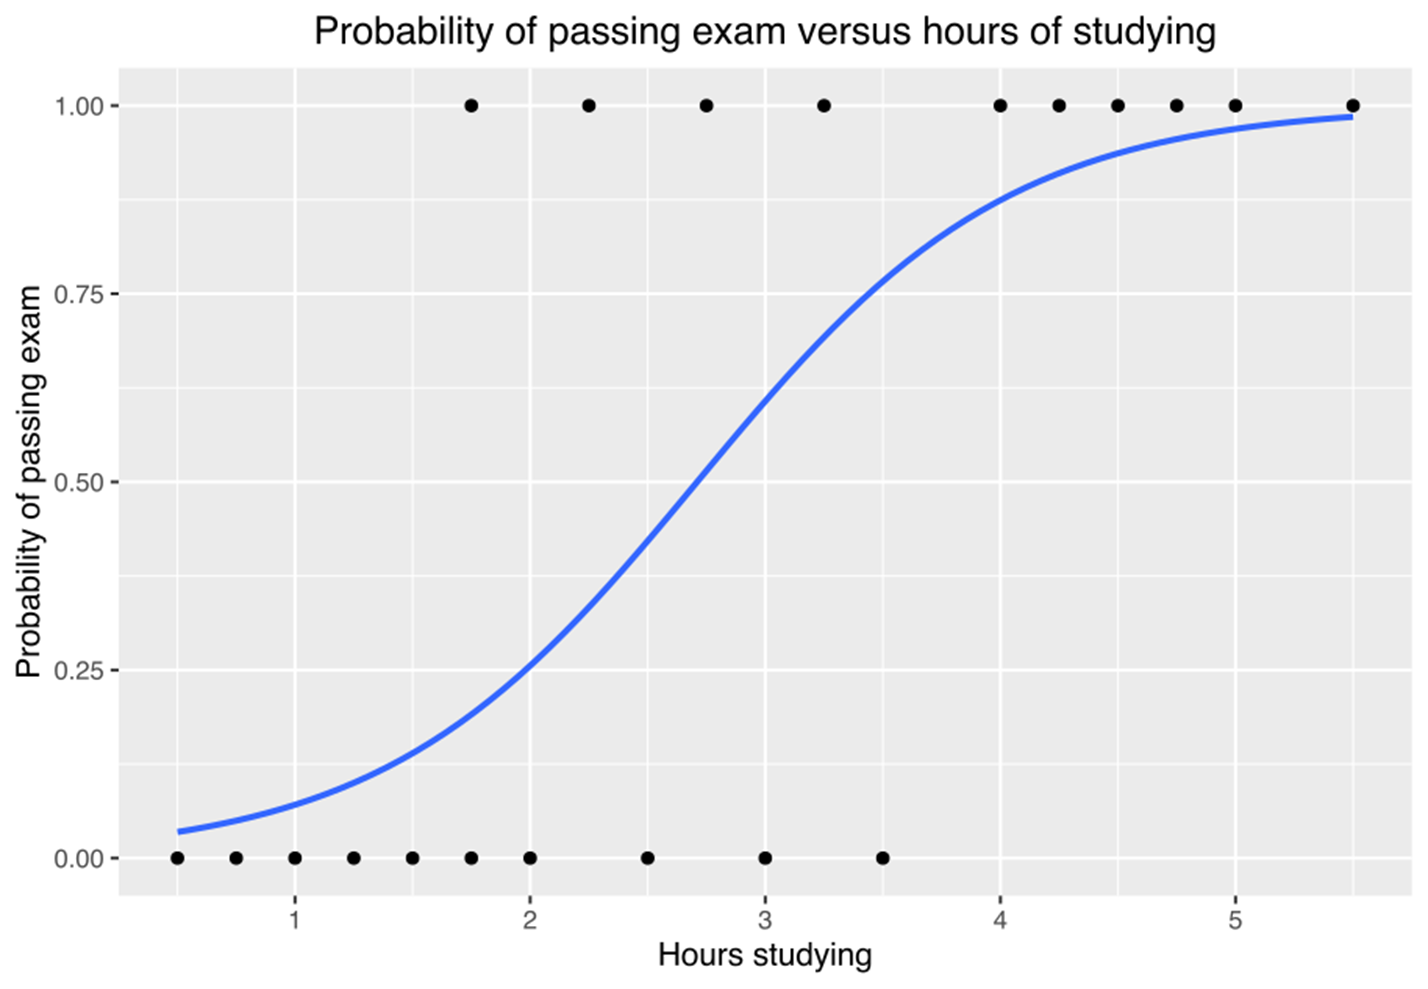

Consider this above graph, which shows the probability of passing an exam depending how long a student studies. This is called a **Sigmoid Function**. The function can be written like this:
$$f(x) = \frac {1}{1 + e^{-x}}$$

## Assumptions of Logistic Regression